In [230]:
import numpy as np

# Fuzzy Relations for Temperature to Humidity (R(X -> Y))
R = {
    "Low Temp": [0.8, 0.5, 0.3],   # Dry, Normal, Humid
    "Medium Temp": [0.6, 0.7, 0.4],
    "High Temp": [0.3, 0.6, 0.9]
}

# Fuzzy Relations for Humidity to Cooling (S(Y -> Z))
S = {
    "Dry": [0.7, 0.4, 0.3],        # Low Cooling, Medium Cooling, High Cooling
    "Normal": [0.5, 0.6, 0.4],
    "Humid": [0.2, 0.5, 0.8]
}

# Input values
temperature_input = "Low Temp"  # Low Temperature
humidity_input = "Dry" 

def minmax(temperature_input,humidity_input):
    x = R[temperature_input]
    y = S[humidity_input]
    res = []
    for i,j in zip(x,y):
        res.append(min(i,j))
    return res

print(f'cooling codition is {minmax(temperature_input,humidity_input)}')
print(f'system select low colling with {max(minmax(temperature_input,humidity_input))}')

cooling codition is [0.7, 0.4, 0.3]
system select low colling with 0.7


In [228]:
inp = {1: 0.2, 2: 0.5, 3: 0.8, 4: 1.0, 5: 0.7}

def la(inp,l):
    ans = []
    for i,j in inp.items():
        if j>=l:
            ans.append(i)
    return sum(ans)/len(ans)

def mem(inp):
    m = max(inp.values())
    ans = [i for i in inp if inp[i]==m]
    return sum(ans)/len(ans)

def cog(inp):
    num = den = 0
    for i,j in inp.items():
        num += i*j
        den += j
    return num/den

print(la(inp,.5),mem(inp),cog(inp))

3.5 4.0 3.4687500000000004


In [115]:
def func(ind):
    x =  int(ind,2)
    return x*x
def sel(pop):
    pop.sort(key = func,reverse=True)
    return pop[0],pop[1]

def cro(p1,p2):
    point = random.randint(1,len(p1)-2)
    return p1[:point]+p2[point:],p2[:point]+p1[point:]

def mut(c):
    point = random.randint(0,len(c)-1)
    return c[:point]+str(1-int(c[point]))+c[point+1:]

def gen1(pop):
    for ite in range(itera):
        p1,p2 = sel(pop)
        # pop = []
        while(len(pop)<12):
            
            c1,c2 = cro(p1,p2)
            pop.append(mut(c1))
            pop.append(mut(c2))
        # print(ite,pop)
        pop.sort(key = func,reverse=True)
        pop = pop[:6]
        print(f'{ite} {func(pop[0])}')
        
def gen():
    pop = []
    for i in range(6):
        # pop.append('')
        s = ''
        for i in range(6):
            r = random.randint(0,1)
            s = s+str(r)
        pop.append(s)
        
    return pop

pop = gen()
gen1(pop)

0 3969
1 3969
2 3969
3 3969
4 3969
5 3969
6 3969
7 3969
8 3969
9 3969


In [184]:
import concurrent.futures

def merg(l,r):
    res = []
    i = j = 0
    while i<len(l) and j < len(r):
        if l[i]<r[j]:
            res.append(l[i])
            i+=1
        else:
            res.append(r[j])
            j+=1
    res.extend(l[i:])
    res.extend(r[j:])
    return res

def merges(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2
    with concurrent.futures.ThreadPoolExecutor() as executor:
        
        ml = executor.submit(merges,arr[:mid])
        mr = executor.submit(merges,arr[mid:])
        l = ml.result()
        r = mr.result()
    # arr = 
    return merg(l,r)
arr = [4,15,2,43,12,2]
print(merges(arr))

[2, 2, 4, 12, 15, 43]


In [149]:
import numpy as np
dist = np.array([[9999,123,44],[14,9999,10],[1,4,9999]])
pher = np.array([[1]*3]*3)
bc = 9999
bp = None
for ite in range(10):
    v = [0]
    r = [1,2]
    while r:
        c = v[-1]
        pr = [pher[c][i]*(1/dist[c][i]) for i in r]
        pr = np.array(pr)/np.sum(pr)
        z = np.random.choice(list(r),p=pr)
        v.append(z)
        r.remove(z)
    v.append(0)
    c = 0
    for i in range(3):
        c+=dist[v[i]][v[i+1]]
    if c<bc:
        bc=c
        bp=v
    pher = np.dot(pher,0.8)
    for i in range(3):
        pher[bp[i]][bp[i+1]] += 100/dist[bp[i]][bp[i+1]]
    print(bp)

[0, 1, 2, 0]
[0, 2, 1, 0]
[0, 2, 1, 0]
[0, 2, 1, 0]
[0, 2, 1, 0]
[0, 2, 1, 0]
[0, 2, 1, 0]
[0, 2, 1, 0]
[0, 2, 1, 0]
[0, 2, 1, 0]


In [27]:
import random
def func(x):
    return x*x

par = [random.uniform(-10,10) for _ in range(0,5)] ###
pbest = par.copy()
pbvalue = [func(i) for i in pbest]
gbest = min(pbest,key = func) ####
# gbest = i if func(ii)==gbvalue else \ for ii in pbvalue 
val = [0]*5
itera = 10
for ite in range (itera):
    res = []
    for i in range (len(par)):
        if pbvalue[i] < func(par[i]):
            res.append(pbest[i])
        else:
            res.append(par[i])
    pbest = res.copy()
    pbvalue = [func(i) for i in pbest]
    gbest = min(pbest,key=func)
    for i in range(len(pbest)):
        val[i] = 0.5*val[i] - 1.5*random.random()*(par[i]-pbest[i]) - 1.5*random.random()*(par[i]-gbest)
        par[i] += val[i]

    print(f'ater {ite+1} iteration best value is {gbest}')


ater 1 iteration best value is 0.5242724031727874
ater 2 iteration best value is 0.5242724031727874
ater 3 iteration best value is 0.13902467290490161
ater 4 iteration best value is 0.13902467290490161
ater 5 iteration best value is -0.039040247570578
ater 6 iteration best value is 0.03364351321903869
ater 7 iteration best value is 0.03364351321903869
ater 8 iteration best value is 0.03364351321903869
ater 9 iteration best value is 0.0022967406864076306
ater 10 iteration best value is 0.0022967406864076306


In [49]:
def func(x):
    return x*x

w = [random.uniform(-100,-100) for _ in range(5)]
itera = 10
a=2
for ite in range(itera):
    w.sort(key = func)
    xa,xb,xc = w[0],w[1],w[2]
    a -= 2/itera
    result = []
    for x in w:
        A = 2*a*random.random()-a
        C = 2*random.random()
        D = abs(C*xa - x)
        x1 = xa - A*D

        A = 2*a*random.random()-a
        C = 2*random.random()
        D = abs(C*xb - x)
        x2 = xb - A*D

        A = 2*a*random.random()-a
        C = 2*random.random()
        D = abs(C*xc - x)
        x3 = xc - A*D

        result.append((x1+x2+x3)/3)
    w.extend(result)
    w.sort(key = func)
    w = w[:5]
    print(f'adter {ite+1} iterations best value is {func(min(w,key=func))}')

adter 1 iterations best value is 1826.6241991053698
adter 2 iterations best value is 388.08100673418437
adter 3 iterations best value is 131.5571297760362
adter 4 iterations best value is 20.49810793506029
adter 5 iterations best value is 0.051687079070915354
adter 6 iterations best value is 0.051687079070915354
adter 7 iterations best value is 0.02547347584021723
adter 8 iterations best value is 0.02547347584021723
adter 9 iterations best value is 0.02547347584021723
adter 10 iterations best value is 0.02547347584021723


C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


True Class  Cluster
setosa      0          49
virginica   1          42
versicolor  2          37
            1          13
virginica   2           8
setosa      2           1
Name: count, dtype: int64


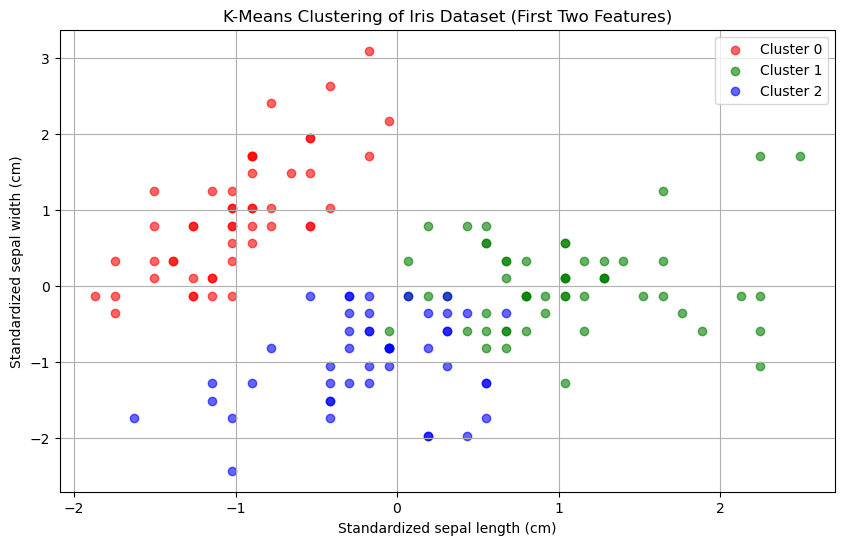

In [232]:
# Crisp Set
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
kmeans = KMeans(n_clusters=3).fit(X)
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['True Class'] = [iris.target_names[i] for i in iris.target]
df['Cluster'] = kmeans.labels_
print(df[['True Class','Cluster']].value_counts())
plt.figure(figsize=(10, 6))

# Define colors for each cluster
colors = ['red', 'green', 'blue']

# Plot each cluster
for i in range(3):  # because n_clusters=3
    plt.scatter(X[df['Cluster'] == i, 0],  # Feature 1
                X[df['Cluster'] == i, 1],  # Feature 2
                c=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.xlabel('Standardized ' + iris.feature_names[0])
plt.ylabel('Standardized ' + iris.feature_names[1])
plt.title('K-Means Clustering of Iris Dataset (First Two Features)')
plt.legend()
plt.grid(True)
plt.show()


In [214]:
def f(x):
    return 1 if x>0.5 else 0

x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])
w1 = np.array([0,0])
b1 = 0
lr = .1
def hibb(x,y,w,b):
    for i in range(10):
        for inp,out in zip(x,y):
            z = np.dot(inp,w)+b
            o = f(z)
            w = np.add(w,lr*out*inp)
            b += lr*out
            print(w,b,o)

def delt(x,y,w,b):
    for i in range(10):
        for inp,out in zip(x,y):
            z = np.dot(inp,w)+b
            o = f(z)
            e = out-o
            w = np.add(w,lr*e*inp)
            b += lr*e
            print(w,b,o)

hibb(x,y,w1,b1)
delt(x,y,w1,b1)

[0. 0.] 0.0 0
[0. 0.] 0.0 0
[0. 0.] 0.0 0
[0.1 0.1] 0.1 0
[0.1 0.1] 0.1 0
[0.1 0.1] 0.1 0
[0.1 0.1] 0.1 0
[0.2 0.2] 0.2 0
[0.2 0.2] 0.2 0
[0.2 0.2] 0.2 0
[0.2 0.2] 0.2 0
[0.3 0.3] 0.30000000000000004 1
[0.3 0.3] 0.30000000000000004 0
[0.3 0.3] 0.30000000000000004 1
[0.3 0.3] 0.30000000000000004 1
[0.4 0.4] 0.4 1
[0.4 0.4] 0.4 0
[0.4 0.4] 0.4 1
[0.4 0.4] 0.4 1
[0.5 0.5] 0.5 1
[0.5 0.5] 0.5 0
[0.5 0.5] 0.5 1
[0.5 0.5] 0.5 1
[0.6 0.6] 0.6 1
[0.6 0.6] 0.6 1
[0.6 0.6] 0.6 1
[0.6 0.6] 0.6 1
[0.7 0.7] 0.7 1
[0.7 0.7] 0.7 1
[0.7 0.7] 0.7 1
[0.7 0.7] 0.7 1
[0.8 0.8] 0.7999999999999999 1
[0.8 0.8] 0.7999999999999999 1
[0.8 0.8] 0.7999999999999999 1
[0.8 0.8] 0.7999999999999999 1
[0.9 0.9] 0.8999999999999999 1
[0.9 0.9] 0.8999999999999999 1
[0.9 0.9] 0.8999999999999999 1
[0.9 0.9] 0.8999999999999999 1
[1. 1.] 0.9999999999999999 1
[0. 0.] 0.0 0
[0. 0.] 0.0 0
[0. 0.] 0.0 0
[0.1 0.1] 0.1 0
[0.1 0.1] 0.1 0
[0.1 0.1] 0.1 0
[0.1 0.1] 0.1 0
[0.2 0.2] 0.2 0
[0.2 0.2] 0.2 0
[0.2 0.2] 0.2 0
[0.2 0.2] 0.2 0

In [240]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging with random features and shallow trees
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=5,
    max_samples=0.5,
    max_features=0.5,
    random_state=42
)

# Train
bag.fit(X_train, y_train)

# Test sample
sample = X_test[0].reshape(1, -1)
print("True label:", y_test[0])
print("Individual Estimator Predictions:")
for i, est in enumerate(bag.estimators_):
    feats = bag.estimators_features_[i]
    print(f"Model {i+1}: {est.predict(sample[:, feats])[0]}")

# Bagging prediction
print("Bagging Final Prediction:", bag.predict(sample)[0])


True label: 1
Individual Estimator Predictions:
Model 1: 1
Model 2: 1
Model 3: 1
Model 4: 1
Model 5: 1
Bagging Final Prediction: 1
